In [4]:
import plotly.graph_objs as go
import kaleido
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'kaleido'

In [ ]:
nodes = dict(pad=15,
             thickness=20,
             line=dict(color="black", width=0.5),
             label=["Theoretical (26)", "Experimental (9)", "Balanced (44)",
                    "None (3)","Theoretical (29)", "Experimental (15)", "Balanced (28)", "None (10)"], 
              x = [0.001, 0.001, 0.001, 0.001, 0.999, 0.999, 0.999, 0.999],
              y = [0.001, 75/285, 160/285, 190/285, 0.001, 75/285, 130/285, 215/285], 
              color=["#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51","#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51"])

In [ ]:
links = dict(source=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3],
             target=[4,5,6,7,4,5,6,7,4,5,6,7,4,5,6,7],
             value =[9,3,10,4,3,1,5,0,16,11,12,5,1,0,1,1],
             color=["#ACBAAD", "#ACBAAD", "#ACBAAD", "#ACBAAD",
             "#D0B49F", "#D0B49F", "#D0B49F", "#D0B49F", 
             "#9DB6CC", "#9DB6CC", "#9DB6CC", "#9DB6CC", "#ab6b51", "#ab6b51","#ab6b51","#ab6b51"])

In [ ]:
layout = dict(font=dict(size=14),
              width=470,
              height=500,
              margin=dict(l=50, r=50, b=50, t=50),
              paper_bgcolor="white",
              plot_bgcolor="white")

In [ ]:
# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(arrangement = 'snap', node=nodes, link=links)],
                 layout=layout)


fig.update_traces(textfont=dict(color='black'))
fig.write_image('outputs/sankey/ReasoningLevel.png', scale = 10)

#Show the diagram
fig.show()

## Argument Level

In [ ]:
# Define the nodes and links of the diagram
nodes1 = dict(pad=15,thickness=20,
             line=dict(color="black", width=0.5),
             label=["Y1-Superficial (34)", "Y1-Extended (24)", "Y1-Deep (14)", 
                    "Y1-Prediction (2)", "Y1-Expert (8)", "Y2-Superficial (28)",
                     "Y2-Extended (25)", "Y2-Deep (15)", "Y2-Prediction (6)", "Y1-Expert (8)"],
             x = [0.001, 0.001, 0.001, 0.001, 0.001, 0.999, 0.999, 0.999, 0.999, 0.999],
             y = [0.001, 75/285, 160/285, 190/285, 210/285, 0.001, 75/285, 130/285, 215/285, 250/285], 
              color=["#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51", "#B7A1A6","#ACBAAD", "#D0B49F", "#9DB6CC", "#ab6b51", "#B7A1A6"])

In [ ]:
links1 = dict(source=[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,],
             target=[5,6,7,8,9,5,6,7,8,9,5,6,7,8,9, 5,6,7,8,9, 5,6,7,8,9,],
             value=[12,9,6,2,5,9,9,4,2,0,4,7,2,1,0,0,0,1,0,1,3,0,2,1,2,],
             color=["#ACBAAD", "#ACBAAD", "#ACBAAD", "#ACBAAD","#ACBAAD","#D0B49F",
                     "#D0B49F", "#D0B49F", "#D0B49F", "#D0B49F", "#9DB6CC",
                     "#9DB6CC", "#9DB6CC", "#9DB6CC", "#9DB6CC", "#ab6b51",
                     "#ab6b51","#ab6b51","#ab6b51", "#ab6b51","#B7A1A6",
                       "#B7A1A6","#B7A1A6","#B7A1A6", "#B7A1A6"])

In [ ]:
# # Define the layout of the diagram
layout = dict(font=dict(size=14),
              width=470,
              height=500,
              margin=dict(l=50, r=50, b=50, t=50),
              paper_bgcolor="white",plot_bgcolor="white")



# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(arrangement = 'snap', node=nodes1, link=links1)], layout=layout)
fig.update_traces(textfont=dict(color='black'))
fig.write_image('outputs/sankey/ArgumentLevel.png', scale = 10)
# Show the diagram
fig.show()

HeatMap

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams['font.family'] = "Arial"
rc('font', weight='normal')

In [30]:
csv_path_y1 = 'outputs/LDA_weights_grades_df_year1.csv'
csv_path_y2 = 'outputs/LDA_weights_grades_df_year2.csv'
df_y1 = pd.read_csv(csv_path_y1)
df_y2 = pd.read_csv(csv_path_y2)
df_y1.head()

,Unnamed: 0,StudentID,Content,ArgumentLevel,ReasoningLevel,GS percent,0,1
0,1,GS_MOX979_Redacted,pectroscopy be the study of the spectrum of li...,superficial,bal,72,0.045177,0.954823
1,2,GS_WHP087_Redacted,this experiment be conduct to determine the ry...,superficial,bal,53,0.072881,0.927119
2,3,GS_NPG050_Redacted,the aim of the experiment be to measure the sp...,superficial,bal,64,0.078394,0.921606
3,4,GS_IHJ555_Redacted,where 𝜆 be the wavelength r ∞ be the rydberg c...,expert,the,61,0.078550,0.921450
4,5,GS_GXI055_Redacted,he aim of this experiment be to determine a va...,extended,the,63,0.083688,0.916311


# YEAR1 Topic Analysis

In [32]:
# find min and max grades
max_grade = max(df_y1['GS percent']) 
min_grade = min(df_y1['GS percent'])
print(max_grade, min_grade) # 决定采用区间 45 - 85, step size 1 

# merge grades
list_grade = set(sorted(df_y1['GS percent']))
print(list_grade)


heatmap_x = []
heatmap_y_topic0 = []
heatmap_y_topic1 = []
heatmap_y_sum = []
for grade in list_grade: # individual weights
    
    heatmap_x.append(grade) #heatmap x
    
    df = df_y1.loc[df_y1['GS percent'] == grade] # reports that has the grade required
    row_number = len(df.index)# number of reports
    topic_zero_weight = df['0'].sum() 
    topic_one_weight = df['1'].sum()
    
    heatmap_y_topic0.append(topic_zero_weight/row_number) # heatmap y - topic0
    heatmap_y_topic1.append(topic_one_weight/row_number)  # heatmap y - topic1
    heatmap_y_sum.append( (topic_zero_weight*(-1)+topic_one_weight)/ row_number ) # heatmap y - both topics
    

# fig, ax = plt.subplots()
# seaborn.heatmap([heatmap_y_sum])

# # plt.scatter(heatmap_x,heatmap_y_topic0, label = 'topic0')
# # plt.scatter(heatmap_x,heatmap_y_topic1, label = 'topic1')
# # plt.scatter(heatmap_x,heatmap_y_sum, label = 'both')
# plt.legend()




84 44
{44, 45, 47, 48, 49, 51, 53, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 80, 81, 84}


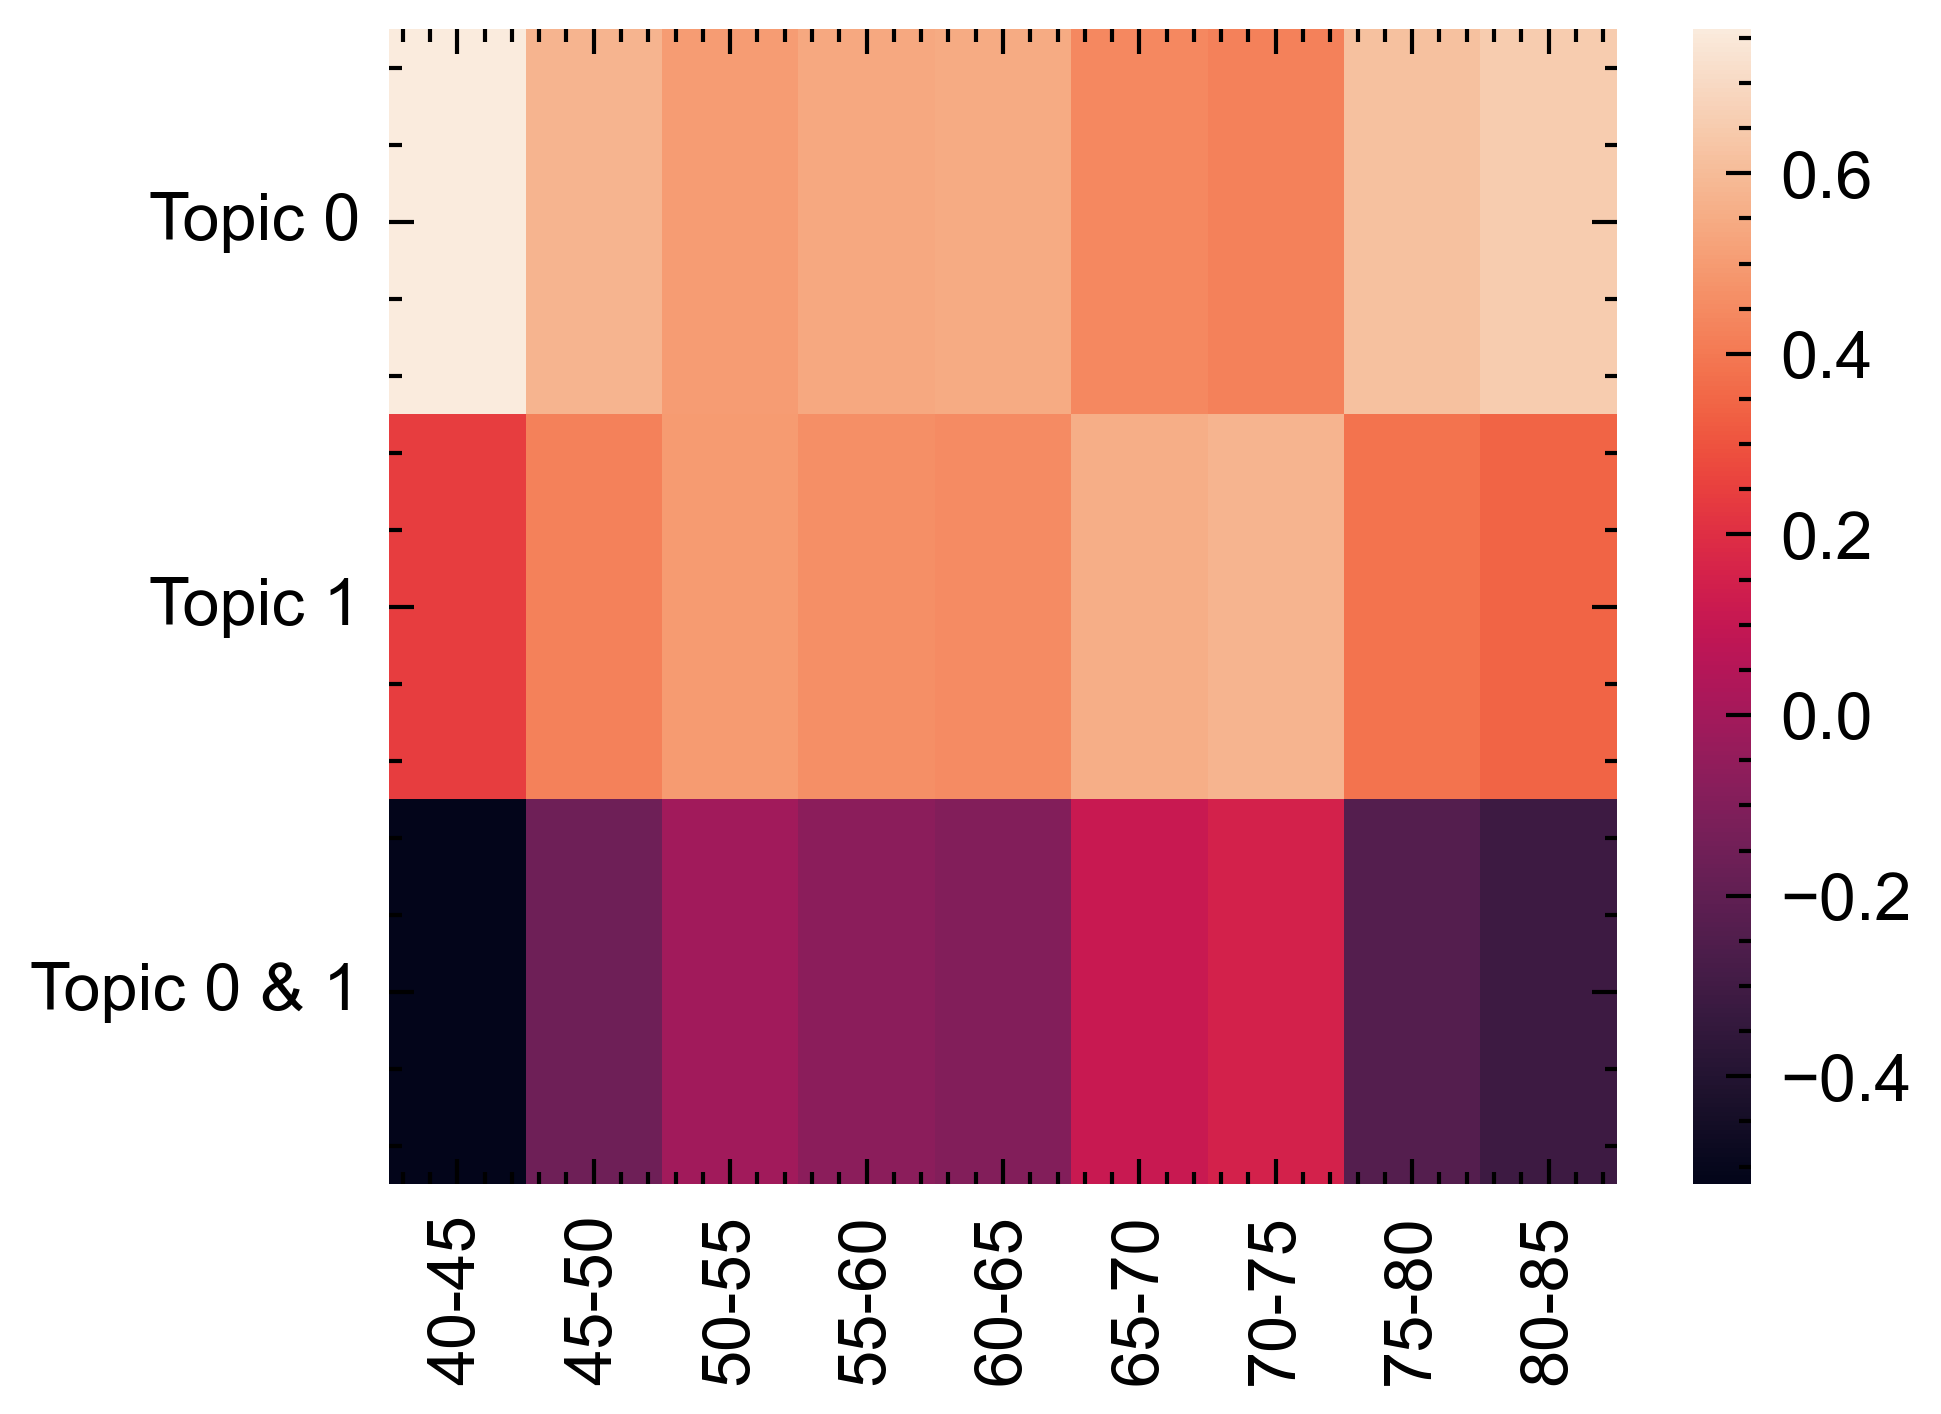

In [33]:
range_grade = np.arange(40, 90, 5) # [40 45 50 55 60 65 70 75 80 85 90]

heatmap_x = []
heatmap_y_topic0 = []
heatmap_y_topic1 = []
heatmap_y_sum = []

for i, grade in enumerate(range_grade): # combined weights
    if i ==9:
        break
    heatmap_x.append( np.sum(range_grade[i] + range_grade[i+1])/2 ) #heatmap x
    
    df = df_y1.loc[(df_y1['GS percent'] >= range_grade[i]) & (df_y1['GS percent'] < range_grade[i+1])] # reports that has the grade required
    
    row_number = len(df.index)# number of reports
    topic_zero_weight = df['0'].sum() 
    topic_one_weight = df['1'].sum()
    
    heatmap_y_topic0.append(topic_zero_weight/row_number) # heatmap y - topic0
    heatmap_y_topic1.append(topic_one_weight/row_number)  # heatmap y - topic1
    heatmap_y_sum.append( (topic_zero_weight*(-1)+topic_one_weight)/ row_number ) # heatmap y - both topics
    

    
fig, ax = plt.subplots()
y_axis_labels = ['Topic 0', 'Topic 1', 'Topic 0 & 1']
xticklabels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85']
svm = seaborn.heatmap([heatmap_y_topic0,heatmap_y_topic1, heatmap_y_sum], yticklabels=y_axis_labels, xticklabels = xticklabels) # all plots
plt.yticks(rotation=0) 

figure = svm.get_figure()    
figure.savefig('figures/heatmap/Year1-heatmap.png', dpi=600, bbox_inches = 'tight')


### Topic 0 & Topic 1 plot only

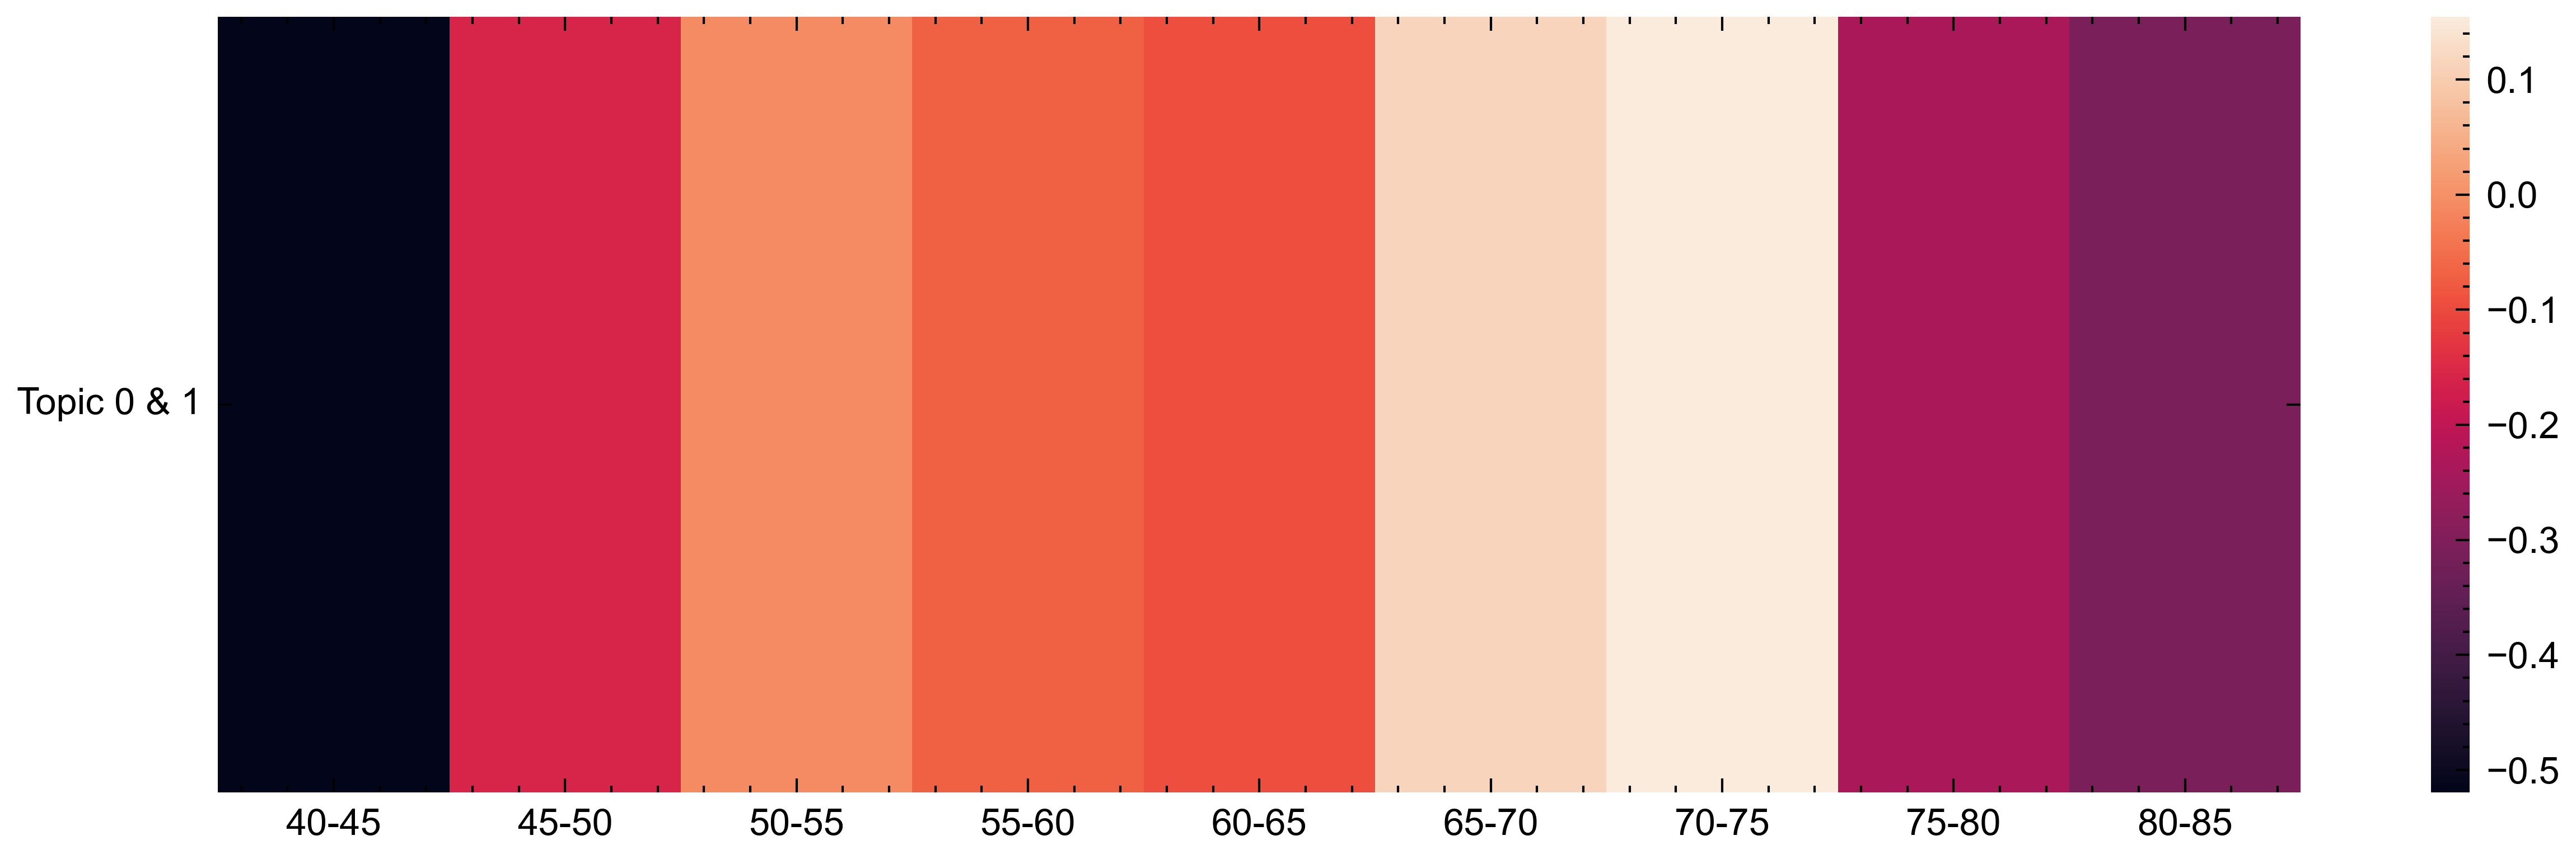

In [34]:
# heatmap
fig, ax = plt.subplots( figsize = (10,3))
y_axis_labels = ['Topic 0 & 1']
xticklabels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85']
svm = seaborn.heatmap([heatmap_y_sum], yticklabels=y_axis_labels, xticklabels = xticklabels) # all plots
plt.yticks(rotation=0) 

figure = svm.get_figure()    
figure.savefig('figures/heatmap/Year1-heatmap.png', dpi=2000, bbox_inches = 'tight')

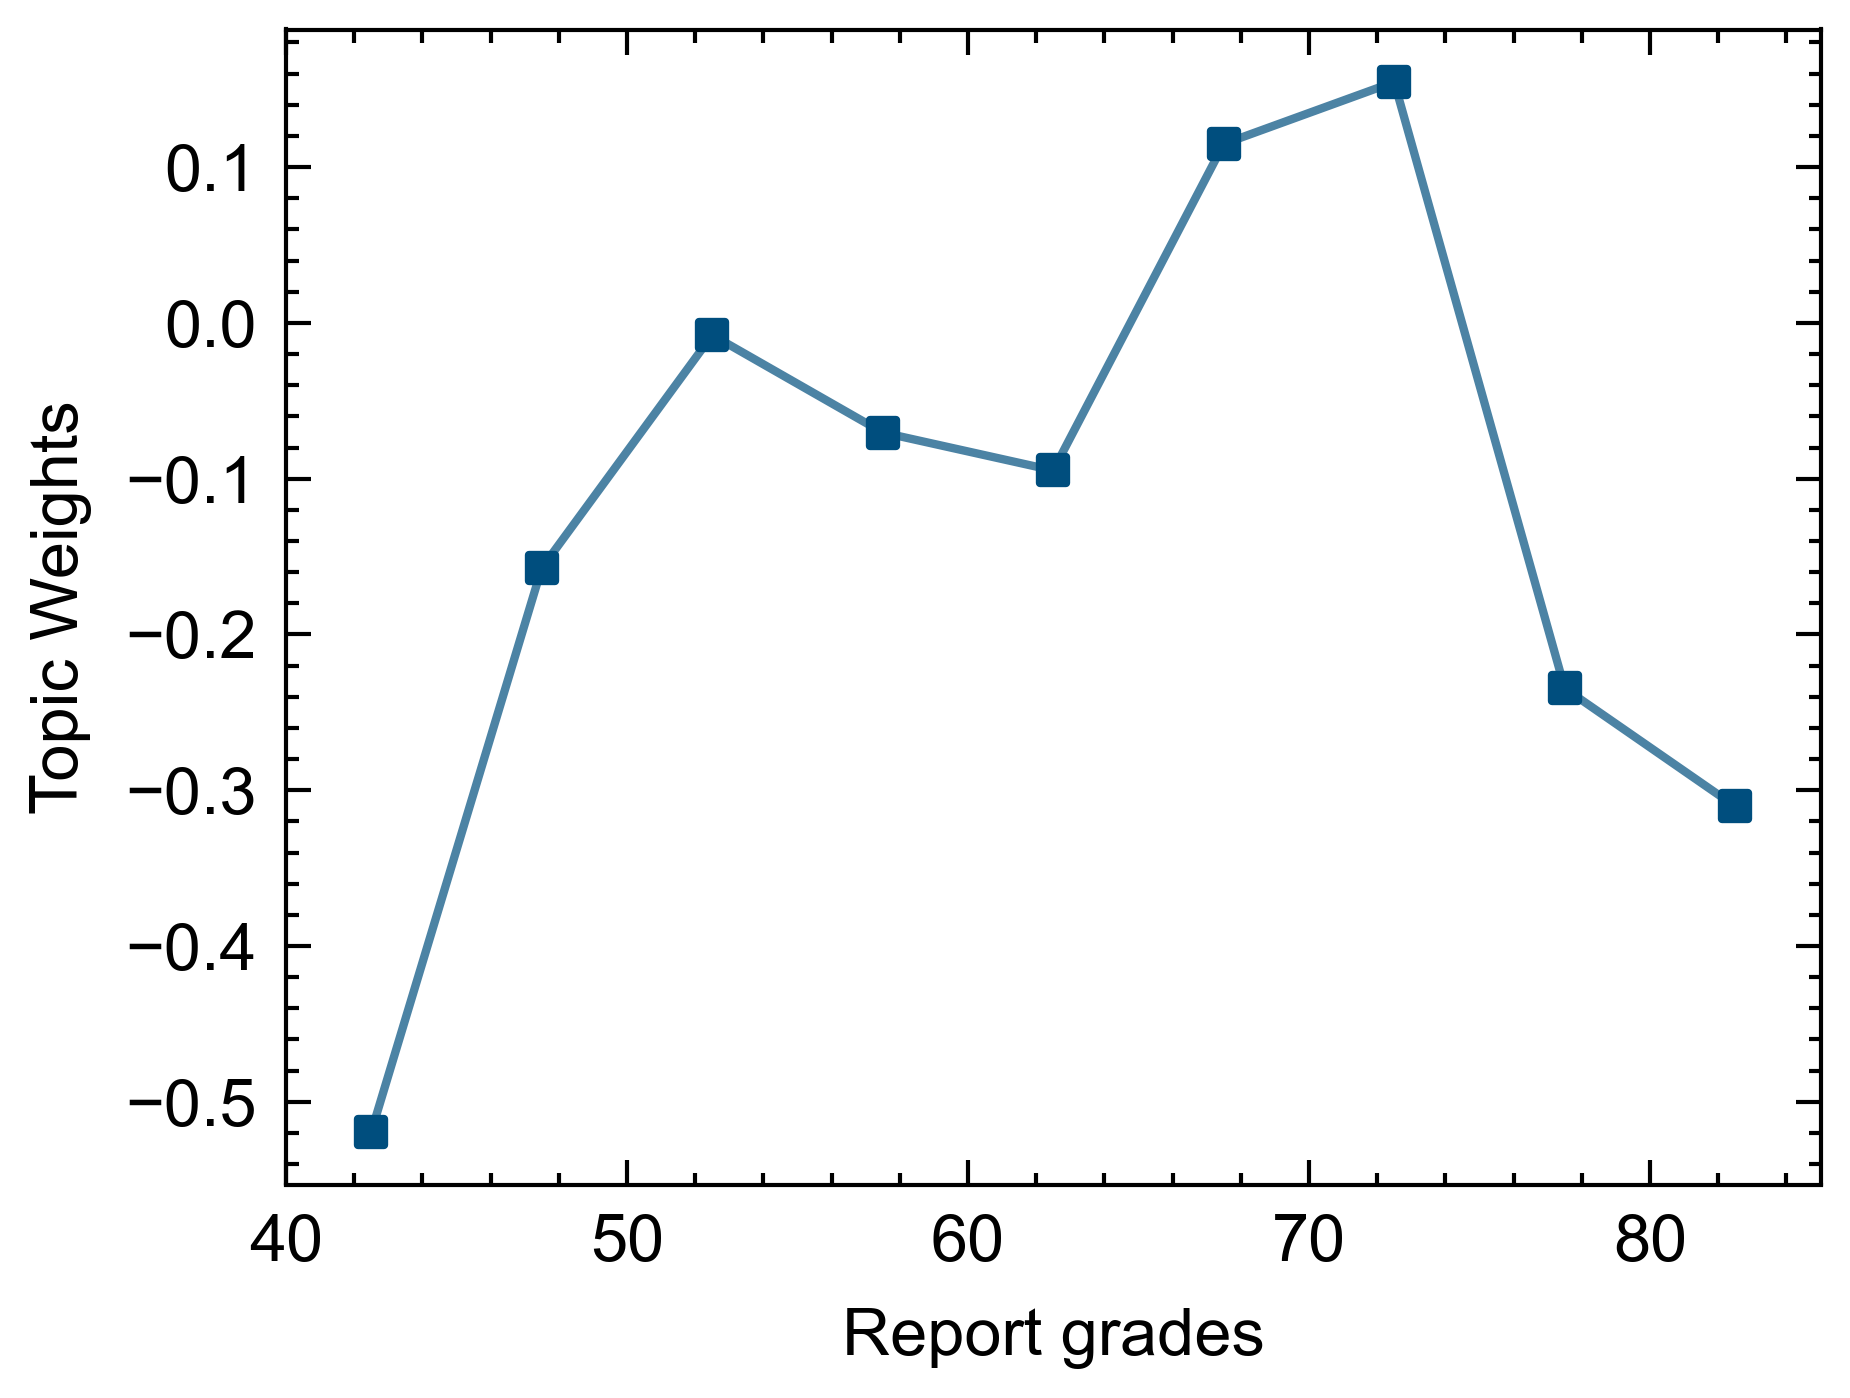

In [35]:
# scatter plot
plt.scatter(heatmap_x, heatmap_y_sum, color = '#004E7E', marker = 's', s= 10, label = 'red')
plt.xlabel("Report grades")
plt.ylabel("Topic Weights") # Topic 1 - positive, Topic 0 - negative
plt.plot(heatmap_x, heatmap_y_sum, linestyle='solid', color='#004E7E', alpha=0.7)
plt.xlim(40, 85)
plt.savefig('figures/heatmap/Year1-scatterplot.png', dpi=1000, bbox_inches = 'tight')

# Year 2 Topic Analysis

In [19]:
# find min and max grades
max_grade = max(df_y2['Interferometry percent']) 
min_grade = min(df_y2['Interferometry percent'])
print(max_grade, min_grade) # 决定采用区间 45 - 85, step size 1 

80 40


In [36]:
range_grade = np.arange(40, 85, 5) 

heatmap_x = []
heatmap_y_topic0 = []
heatmap_y_topic1 = []
heatmap_y_sum = []

for i, grade in enumerate(range_grade): # combined weights
    if i == 8:
        break
    heatmap_x.append( np.sum(range_grade[i] + range_grade[i+1])/2 ) #heatmap x
    
    df = df_y2.loc[(df_y2['Interferometry percent'] >= range_grade[i]) & (df_y2['Interferometry percent'] <= range_grade[i+1])] # reports that has the grade required
    
    row_number = len(df.index)# number of reports
    topic_zero_weight = df['0'].sum() 
    topic_one_weight = df['1'].sum()
    
    heatmap_y_topic0.append(topic_zero_weight/row_number) # heatmap y - topic0
    heatmap_y_topic1.append(topic_one_weight/row_number)  # heatmap y - topic1
    heatmap_y_sum.append( (topic_zero_weight*(-1)+topic_one_weight)/ row_number ) # heatmap y - both topics
    

# fig, ax = plt.subplots()
# y_axis_labels = ['Topic 0', 'Topic 1', 'Topic 0 & 1']
# xticklabels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']
# svm = seaborn.heatmap([heatmap_y_topic0,heatmap_y_topic1, heatmap_y_sum], yticklabels=y_axis_labels, xticklabels = xticklabels)
# plt.yticks(rotation=0) 

# figure = svm.get_figure()    
# figure.savefig('figures/heatmap/Year2-heatmap.png', dpi=600, bbox_inches = 'tight')

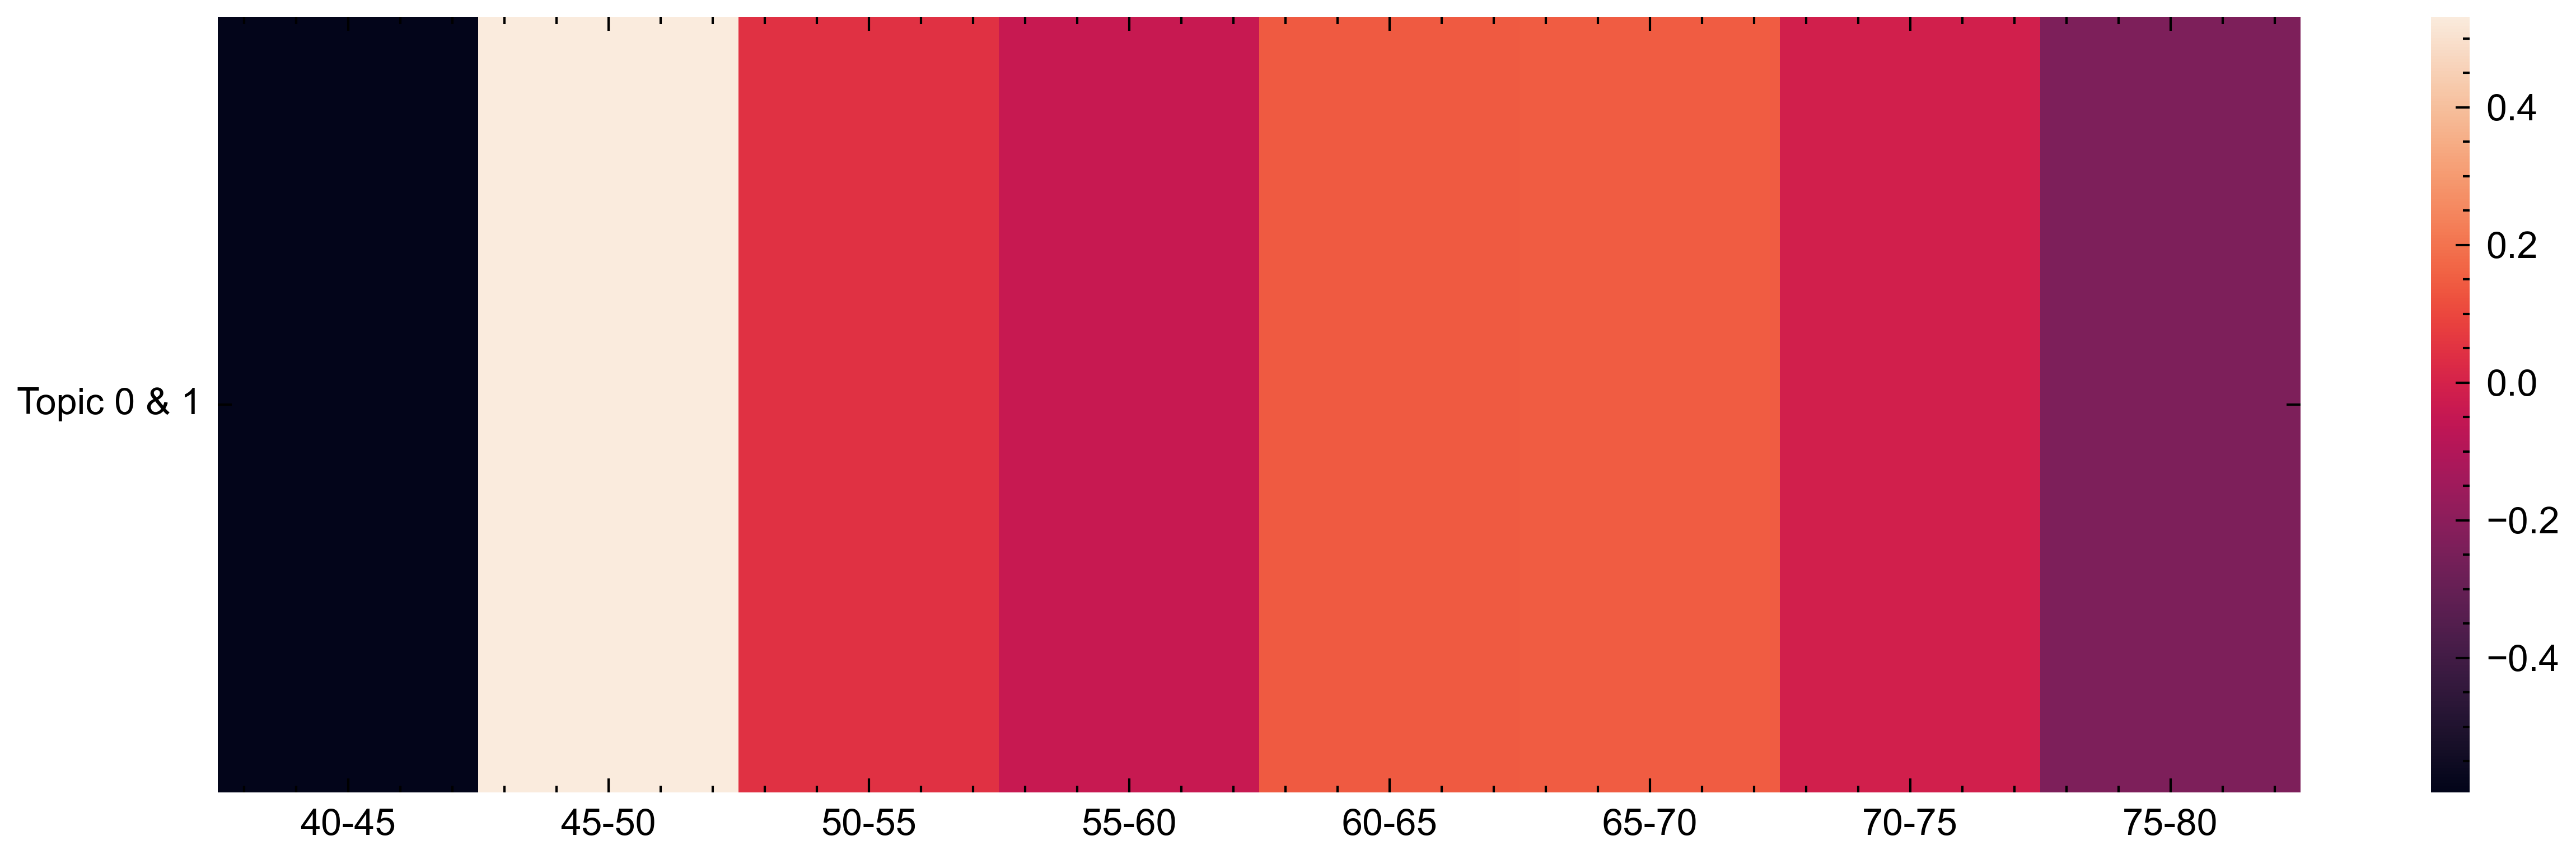

In [37]:
# heatmap
fig, ax = plt.subplots( figsize = (10,3))
y_axis_labels = ['Topic 0 & 1']
xticklabels = ['40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']
svm = seaborn.heatmap([heatmap_y_sum], yticklabels=y_axis_labels, xticklabels = xticklabels) # all plots
plt.yticks(rotation=0) 


figure = svm.get_figure()    
figure.savefig('figures/heatmap/Year2-heatmap.png', dpi=2000, bbox_inches = 'tight')


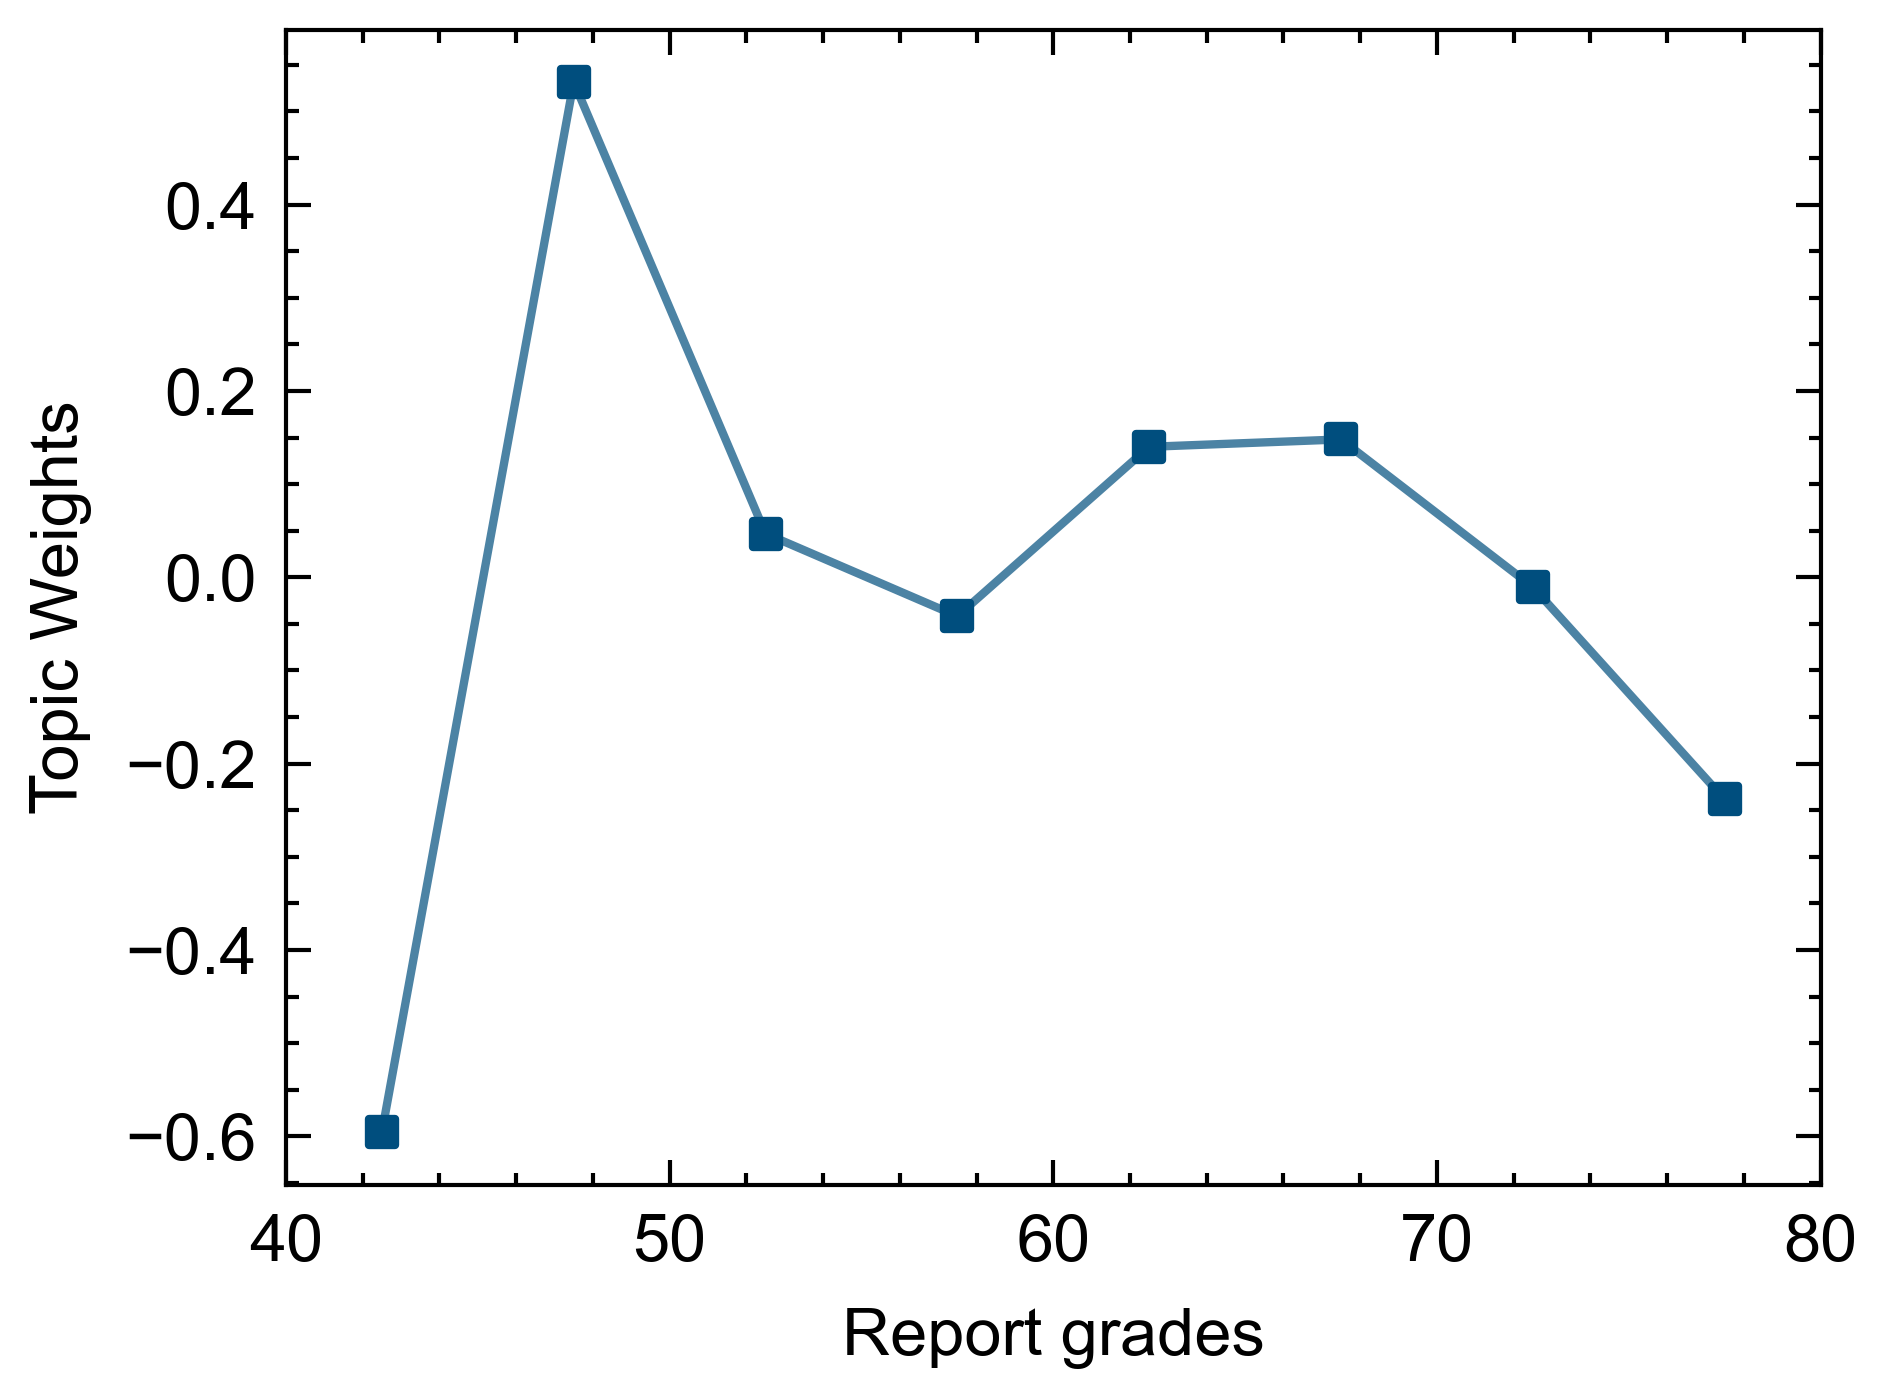

In [38]:
# scatter plot
plt.scatter(heatmap_x, heatmap_y_sum, color = '#004E7E', marker = 's', s= 10, label = 'red')
plt.xlabel("Report grades")
plt.ylabel("Topic Weights") # Topic 1 - positive, Topic 0 - negative
plt.plot(heatmap_x, heatmap_y_sum, linestyle='solid', color='#004E7E', alpha=0.7)
plt.xlim(40, 80)
plt.savefig('figures/heatmap/Year2-scatterplot.png', dpi=1000, bbox_inches = 'tight')

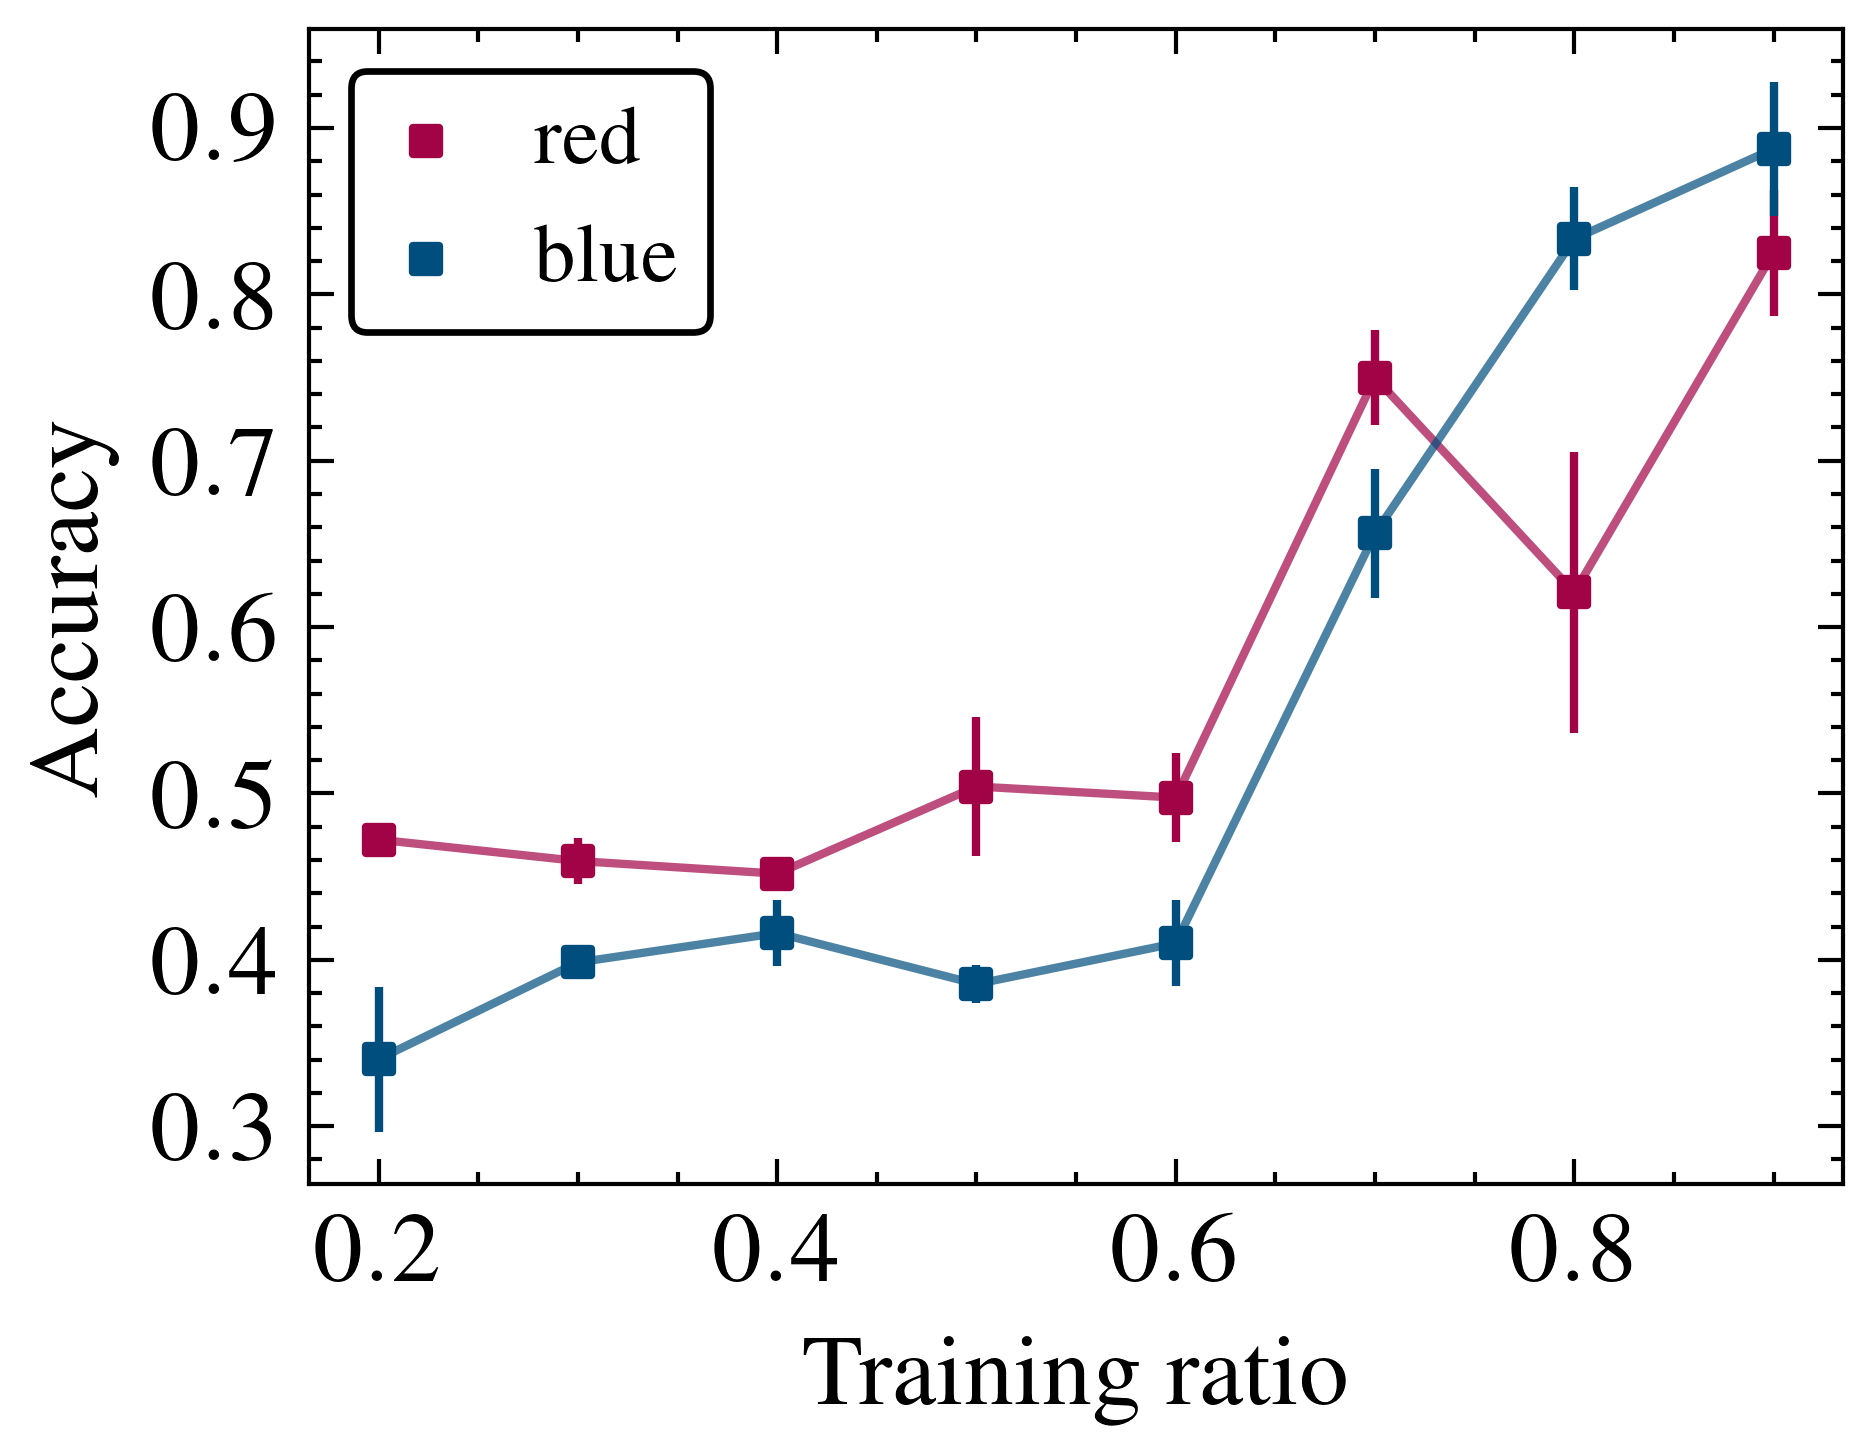

In [14]:
import matplotlib.pyplot as plt

import numpy as np
import scienceplots
plt.style.use(['science', 'ieee'])
params = {'legend.fontsize':10, 'legend.handlelength': 1, 'font.weight': 'bold'} 
plt.rcParams.update(params)

# TODO: change to Aerial font

    
 
xvalue = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
yvalue = [0.47222221493721006, 0.459375, 0.45178571343421936, 0.5041666686534881, 0.49750000834465025, 0.75, 0.6208333432674408, 0.825]
yerr = [0.008784104088006155, 0.01384378527083543, 0.00919252600184733, 0.04161455118809117, 0.026634096005599506, 0.028384222069663984, 0.08421409751357443, 0.03775951866748304]
xlabel = 'Training ratio'
ylabel = 'Accuracy'

y2value = [0.340277773141861, 0.3984375, 0.41607142686843873, 0.38541666865348817, 0.41000000238418577, 0.65625, 0.8333333253860473, 0.8875]
y2err = [0.043645155324258236, 0.010186253758129139, 0.01988487475075547, 0.011410886614691999, 0.02604083366333376, 0.038590903235088965, 0.030900831717867647, 0.04026280852101601]








'''
marker list: https://matplotlib.org/stable/api/markers_api.html
colour code:
    red = #A20346
    blue = #004E7E
    yellow = #F27C0A
    green = #3D4E1D
    purple = #2E206B
    tur = #006D7D
    ref: https://www.cam.ac.uk/brand-resources/guidelines/typography-and-colour/colour-palette
linestyle list: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html    
'''

fig, ax1 = plt.subplots()

plt.scatter(xvalue, yvalue, color = '#A20346', marker = 's', s= 10, label = 'red')
plt.errorbar(xvalue, yvalue, yerr, color='#A20346', fmt='none')
plt.plot(xvalue, yvalue, linestyle='solid', color='#A20346', alpha=0.7)


plt.scatter(xvalue, y2value, color = '#004E7E', marker = 's', s= 10, label = 'blue')
plt.errorbar(xvalue, y2value, y2err, color='#004E7E', fmt='none')
plt.plot(xvalue, y2value, linestyle='solid', color='#004E7E', alpha=0.7)


plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)

plt.xticks(size = 12)
plt.yticks( size = 12, fontweight = 'bold', )


legend = plt.legend(loc='upper left', framealpha=1, frameon=True, edgecolor = 'black')
legend.get_frame().set_linewidth(0.8)


plt.savefig('example.png', dpi=1000)

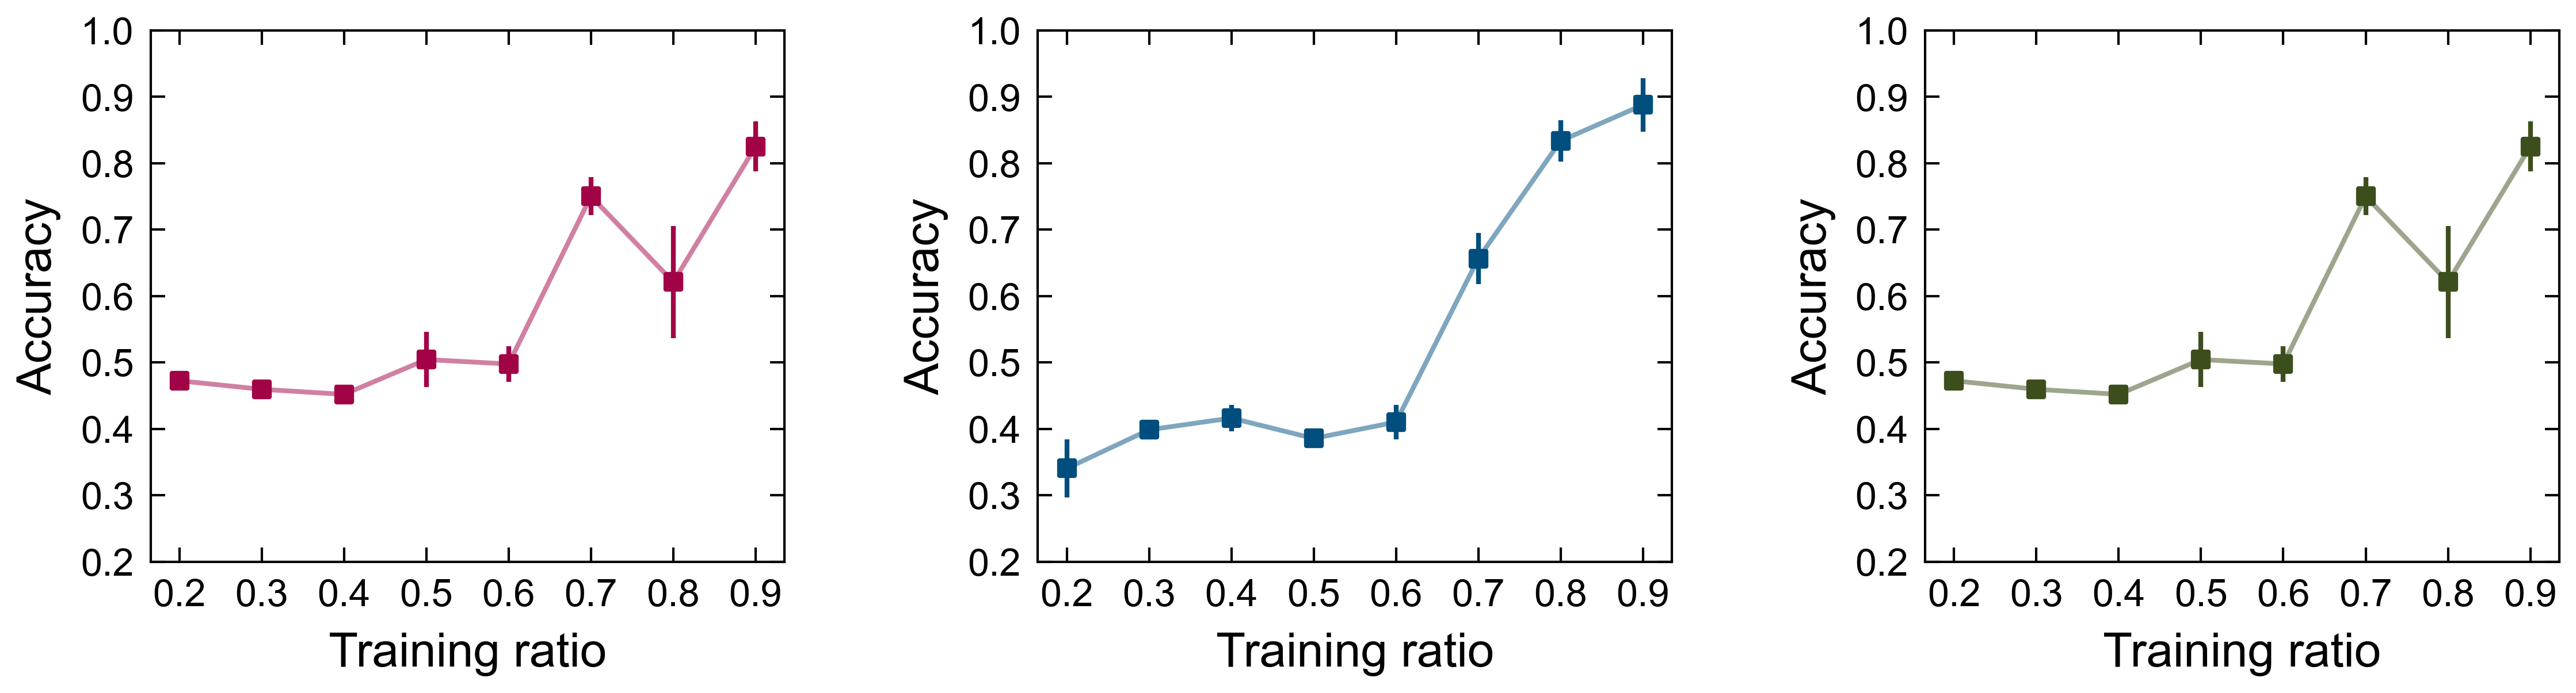

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
from matplotlib import rc, rcParams
plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams['font.family'] = "Arial"
rc('font', weight='normal')


# Create a figure with three subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (9,2)) #, figsize=(12, 4)


# Plot the first subplot on the left
axes[0].scatter(xvalue, yvalue, color = '#A20346', marker = 's', s= 10, label = 'red')
axes[0].errorbar(xvalue, yvalue, yerr, color='#A20346', fmt='none')
axes[0].plot(xvalue, yvalue, linestyle='solid', color='#A20346', alpha=0.5)
axes[0].set_xlabel('Training ratio', fontsize=10)
axes[0].set_ylabel('Accuracy', fontsize=10)
axes[0].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[0].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[0].minorticks_off()

# Plot the second subplot in the middle
axes[1].scatter(xvalue, y2value, color = '#004E7E', marker = 's', s= 10, label = 'blue')
axes[1].errorbar(xvalue, y2value, y2err, color='#004E7E', fmt='none')
axes[1].plot(xvalue, y2value, linestyle='solid', color='#004E7E', alpha=0.5)
axes[1].set_xlabel('Training ratio', fontsize=10)
axes[1].set_ylabel('Accuracy', fontsize=10)
axes[1].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[1].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[1].minorticks_off()


# Plot the third subplot on the right
axes[2].scatter(xvalue, yvalue, color = '#3D4E1D', marker = 's', s= 10, label = 'red')
axes[2].errorbar(xvalue, yvalue, yerr, color='#3D4E1D', fmt='none')
axes[2].plot(xvalue, yvalue, linestyle='solid', color='#3D4E1D', alpha=0.5)
axes[2].set_xlabel('Training ratio', fontsize=10) # , fontweight = 'bold'
axes[2].set_ylabel('Accuracy', fontsize=10) # fontweight = 'bold'
axes[2].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[2].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[2].minorticks_off()


# Add a shared y-axis label to the leftmost plot
# fig.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')
# Add a shared x-axis label to the bottom plot
# fig.text(0.5, 0.06, 'Time', ha='center', va='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)


filename = 'example.png'
plt.savefig(filename, dpi = 1000)
# Show the plot
plt.show()

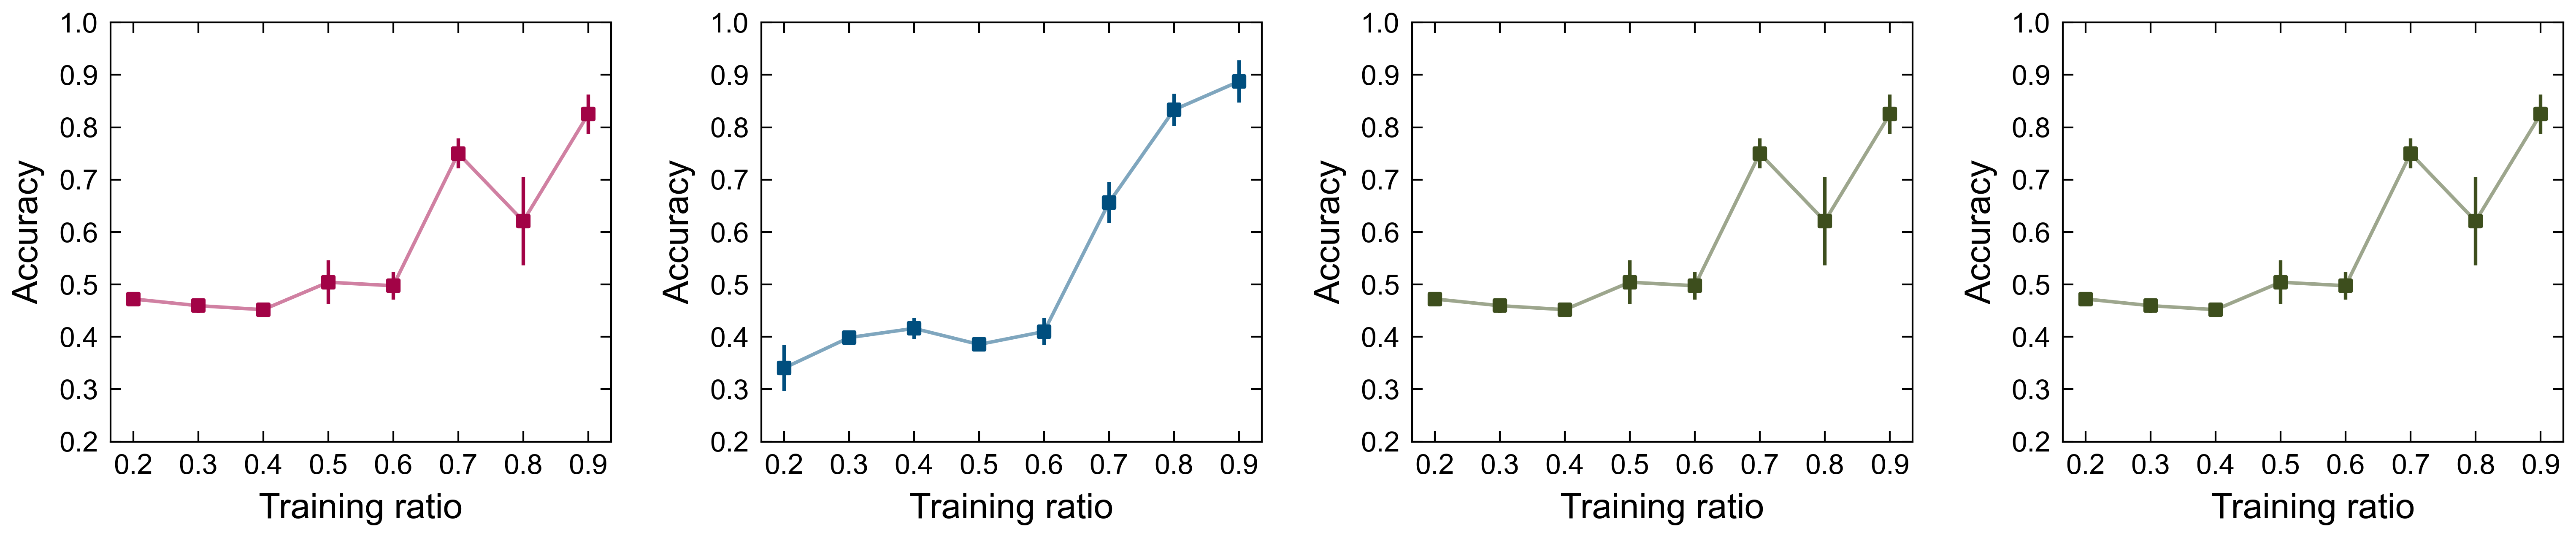

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
from matplotlib import rc, rcParams
plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams['font.family'] = "Arial"
rc('font', weight='normal')


# Create a figure with three subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (12.5,2.15)) #, figsize=(12, 4)


# Plot the first subplot on the left
axes[0].scatter(xvalue, yvalue, color = '#A20346', marker = 's', s= 10, label = 'red')
axes[0].errorbar(xvalue, yvalue, yerr, color='#A20346', fmt='none')
axes[0].plot(xvalue, yvalue, linestyle='solid', color='#A20346', alpha=0.5)
axes[0].set_xlabel('Training ratio', fontsize=10)
axes[0].set_ylabel('Accuracy', fontsize=10)
axes[0].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[0].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[0].minorticks_off()

# Plot the second subplot in the middle
axes[1].scatter(xvalue, y2value, color = '#004E7E', marker = 's', s= 10, label = 'blue')
axes[1].errorbar(xvalue, y2value, y2err, color='#004E7E', fmt='none')
axes[1].plot(xvalue, y2value, linestyle='solid', color='#004E7E', alpha=0.5)
axes[1].set_xlabel('Training ratio', fontsize=10)
axes[1].set_ylabel('Accuracy', fontsize=10)
axes[1].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[1].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[1].minorticks_off()


# Plot the third subplot on the right
axes[2].scatter(xvalue, yvalue, color = '#3D4E1D', marker = 's', s= 10, label = 'red')
axes[2].errorbar(xvalue, yvalue, yerr, color='#3D4E1D', fmt='none')
axes[2].plot(xvalue, yvalue, linestyle='solid', color='#3D4E1D', alpha=0.5)
axes[2].set_xlabel('Training ratio', fontsize=10) # , fontweight = 'bold'
axes[2].set_ylabel('Accuracy', fontsize=10) # fontweight = 'bold'
axes[2].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[2].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[2].minorticks_off()

# Plot the fourth subplot on the right
axes[3].scatter(xvalue, yvalue, color = '#3D4E1D', marker = 's', s= 10, label = 'red')
axes[3].errorbar(xvalue, yvalue, yerr, color='#3D4E1D', fmt='none', )
axes[3].plot(xvalue, yvalue, linestyle='solid', color='#3D4E1D', alpha=0.5)
axes[3].set_xlabel('Training ratio', fontsize=10) # , fontweight = 'bold'
axes[3].set_ylabel('Accuracy', fontsize=10) # fontweight = 'bold'
axes[3].xaxis.set_ticks(np.arange(0.2, 1.0, 0.1))
axes[3].yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
axes[3].minorticks_off()



# Add a shared y-axis label to the leftmost plot
# fig.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')
# Add a shared x-axis label to the bottom plot
# fig.text(0.5, 0.06, 'Time', ha='center', va='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3)


filename = 'example.png'
plt.savefig(filename, dpi = 1000)
# Show the plot
plt.show()